In [119]:
import pandas as pd
import glob 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

In [120]:
dust_zip = glob.glob('../datascience/data/dust/*.csv')
len(dust_zip)

12

In [121]:
dust_list=[]
for x in dust_zip:
    point = x.find('_')
    df = pd.read_csv(x, encoding='cp949', index_col=0)
    dust_list.append(df)
    
len(dust_list)
    

12

In [122]:
dust_df = pd.concat(dust_list)
print(dust_df.head())
print(dust_df.shape)

     ...1   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X22  X23  X24  \
1  서울시 평균  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0  1.0  1.0   
2     종로구  1.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0  1.0  1.0   
3      중구  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0  1.0  1.0   
4     용산구  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0  1.0  1.0   
5     성동구  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0  1.0  1.0   

   X25  X26  X27  X28  X29  X30  X31  
1  1.0  1.0  2.0  1.0  2.0  2.0  2.0  
2  1.0  1.0  2.0  1.0  2.0  2.0  2.0  
3  1.0  1.0  2.0  1.0  2.0  2.0  2.0  
4  1.0  1.0  2.0  1.0  2.0  2.0  2.0  
5  1.0  1.0  2.0  1.0  2.0  2.0  2.0  

[5 rows x 32 columns]
(312, 32)


In [123]:
dust_df_melt = pd.melt(dust_df, id_vars='...1')
dust_df_melt.rename(columns={'...1' : '자치구명', 'variable':'Day', 'value':'먼지수치'}, inplace=True)
dust_df_melt

,자치구명,Day,먼지수치
0,서울시 평균,X1,2.0
1,종로구,X1,1.0
2,중구,X1,1.0
3,용산구,X1,2.0
4,성동구,X1,2.0
...,...,...,...
9667,관악구,X31,NaN
9668,서초구,X31,NaN
9669,강남구,X31,NaN
9670,송파구,X31,NaN


In [126]:
a = dust_df_melt.pivot_table(index=['자치구명','먼지수치'], aggfunc='count').reset_index()
a


,자치구명,먼지수치,Day
0,강남구,0.0,64
1,강남구,1.0,141
2,강남구,2.0,138
3,강남구,3.0,22
4,강동구,0.0,30
...,...,...,...
99,중구,3.0,19
100,중랑구,0.0,68
101,중랑구,1.0,147
102,중랑구,2.0,130


<function matplotlib.pyplot.show(close=None, block=None)>

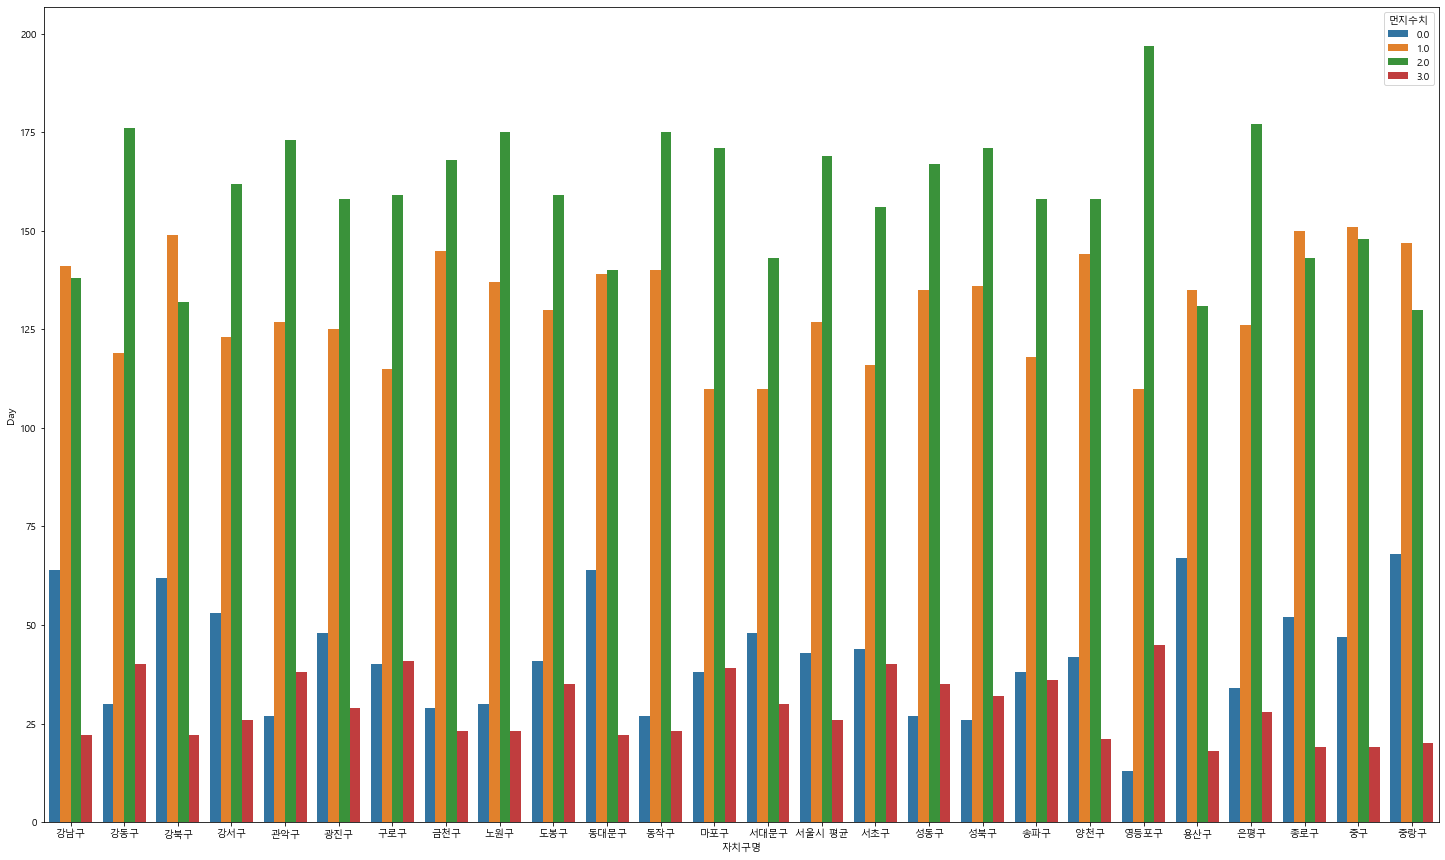

In [127]:
plt.figure(figsize=(25,15))
sns.barplot(x='자치구명', y='Day', hue='먼지수치', data=a)
plt.show

## 제출 이후 테스트

In [128]:
dust_df

,...1,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,서울시 평균,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
2,종로구,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
3,중구,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
4,용산구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
5,성동구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,관악구,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN
23,서초구,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN
24,강남구,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN
25,송파구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN


In [133]:
dust_df.rename(columns={'...1' : '자치구명', 'variable':'Day', 'value':'먼지수치'}, inplace=True)
dust_df_sort = pd.melt(dust_df, id_vars='자치구명').sort_values(by='자치구명')
dust_pivot = dust_df_sort.pivot_table(index=['자치구명','value'], aggfunc='count')
dust_pivot



variable
자치구명 value          
강남구  0.0          64
     1.0         141
     2.0         138
     3.0          22
강동구  0.0          30
...              ...
중구   3.0          19
중랑구  0.0          68
     1.0         147
     2.0         130
     3.0          20

[104 rows x 1 columns]

In [ ]:
# crosstab 인덱스 별 집계
# crosstab = pd.crosstab(index, columns)